#Diagonsis of PD using Machine Learning Algorithms

In [2]:
import numpy as np
import pandas as pd

In [4]:
#Load the dataset
df = pd.read_csv("parkinsons.data")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and
#a general idea of likely challenges in the dataset. (2.5 points)
#Structure of the file 
# we have 195 rows and 2 columns in the file
df.shape

(195, 24)

In [8]:
#Description of the file, portraying the arithmetic values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [9]:
#data types and structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

Description of the columns:

These are available in the names.data file in the link

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

In [10]:
#checking for null values
F=df.isna().sum()
F

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [18]:
df.name.head()

0    phon_R01_S01_1
1    phon_R01_S01_2
2    phon_R01_S01_3
3    phon_R01_S01_4
4    phon_R01_S01_5
Name: name, dtype: object

In [22]:
#We dont have anything to do with name column, hence dropping it
data = df.drop("name", axis = 1)

In [24]:
data.shape

(195, 23)

# Univariate and Bivariate Analysis

#Univariate analysis is the analysis of one (“uni”) variable. Bivariate analysis is the analysis of exactly two variables

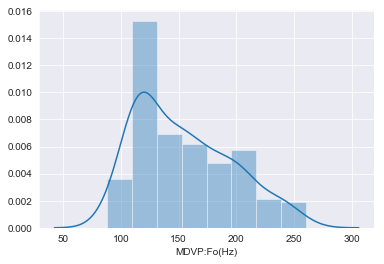

In [30]:
#Univariate Analysis of the dataset
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(data['MDVP:Fo(Hz)'])

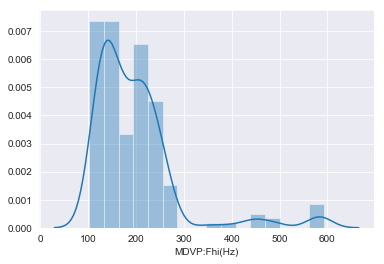

In [32]:
sns.distplot(data['MDVP:Fhi(Hz)'])

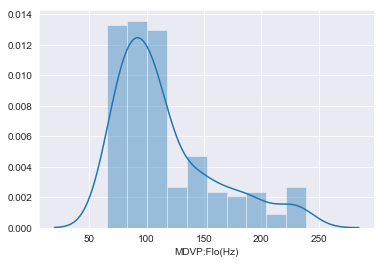

In [34]:
sns.distplot(data['MDVP:Flo(Hz)'])

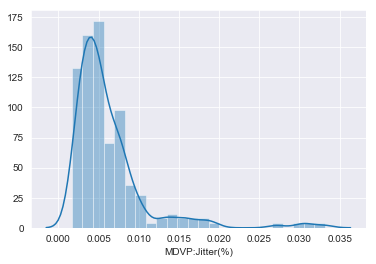

In [35]:
sns.distplot(data['MDVP:Jitter(%)'])

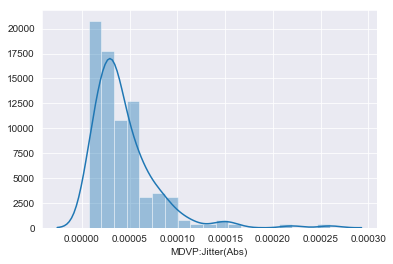

In [36]:
sns.distplot(data['MDVP:Jitter(Abs)'])

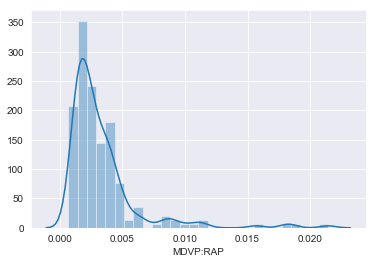

In [37]:
sns.distplot(data['MDVP:RAP'])

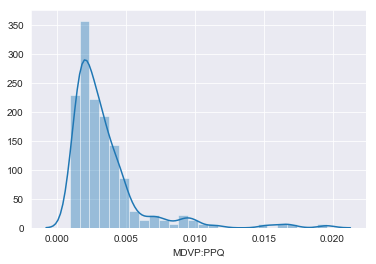

In [38]:
sns.distplot(data['MDVP:PPQ'])

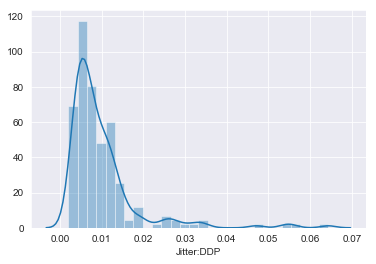

In [39]:
sns.distplot(data['Jitter:DDP'])

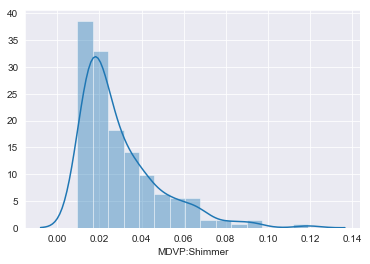

In [40]:
sns.distplot(data['MDVP:Shimmer'])

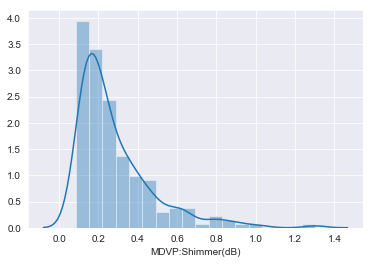

In [41]:
sns.distplot(data['MDVP:Shimmer(dB)'])

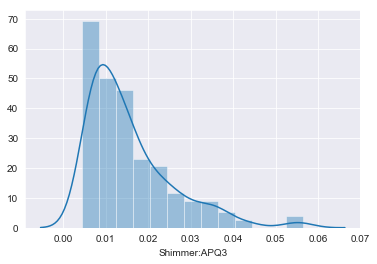

In [42]:
sns.distplot(data['Shimmer:APQ3'])

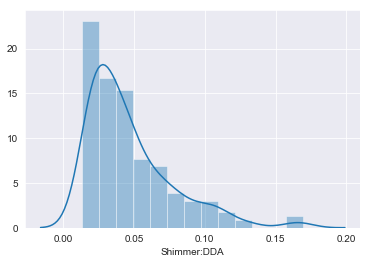

In [43]:
sns.distplot(data['Shimmer:DDA'])

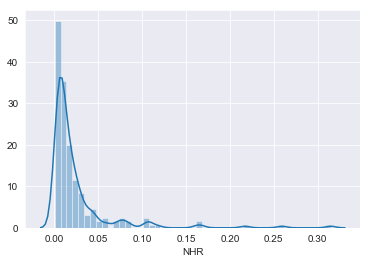

In [44]:
sns.distplot(data['NHR'])

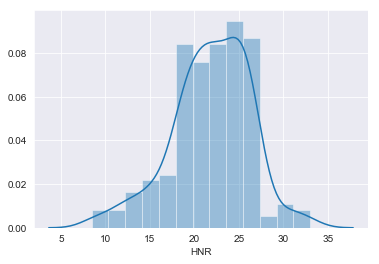

In [45]:
sns.distplot(data['HNR'])

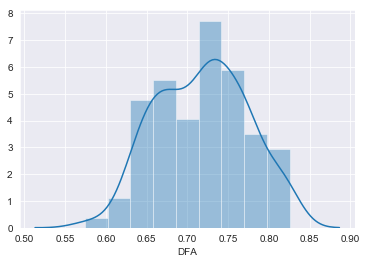

In [46]:
sns.distplot(data['DFA'])

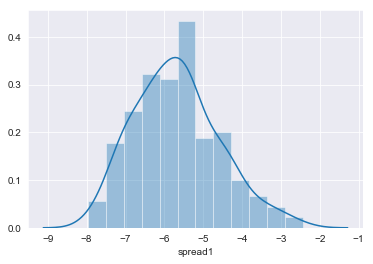

In [47]:
sns.distplot(data['spread1'])

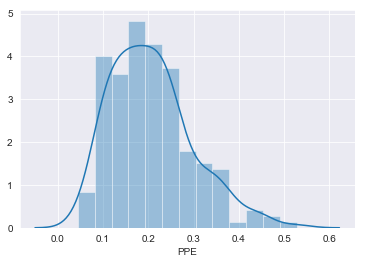

In [48]:
sns.distplot(data['PPE'])

In [ ]:
# From the univariate analysis we can conclude that the variables are right tailed distribution 
# Eventually this means they are positively skewed 

In [53]:
#checking the number of 0s and 1s
pd.value_counts(data["status"])

1    147
0     48
Name: status, dtype: int64

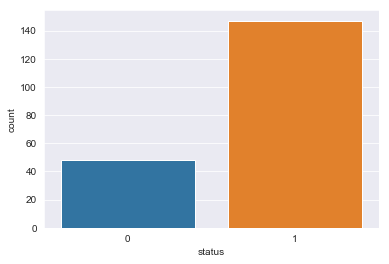

In [52]:
sns.countplot(data.status)

In [ ]:
#From this we can conclude that 147 peoples are affected with pd and 48 are healthy - this is based on the voice signals

# Bivariate Analysis

In [58]:
corr = data.corr()
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


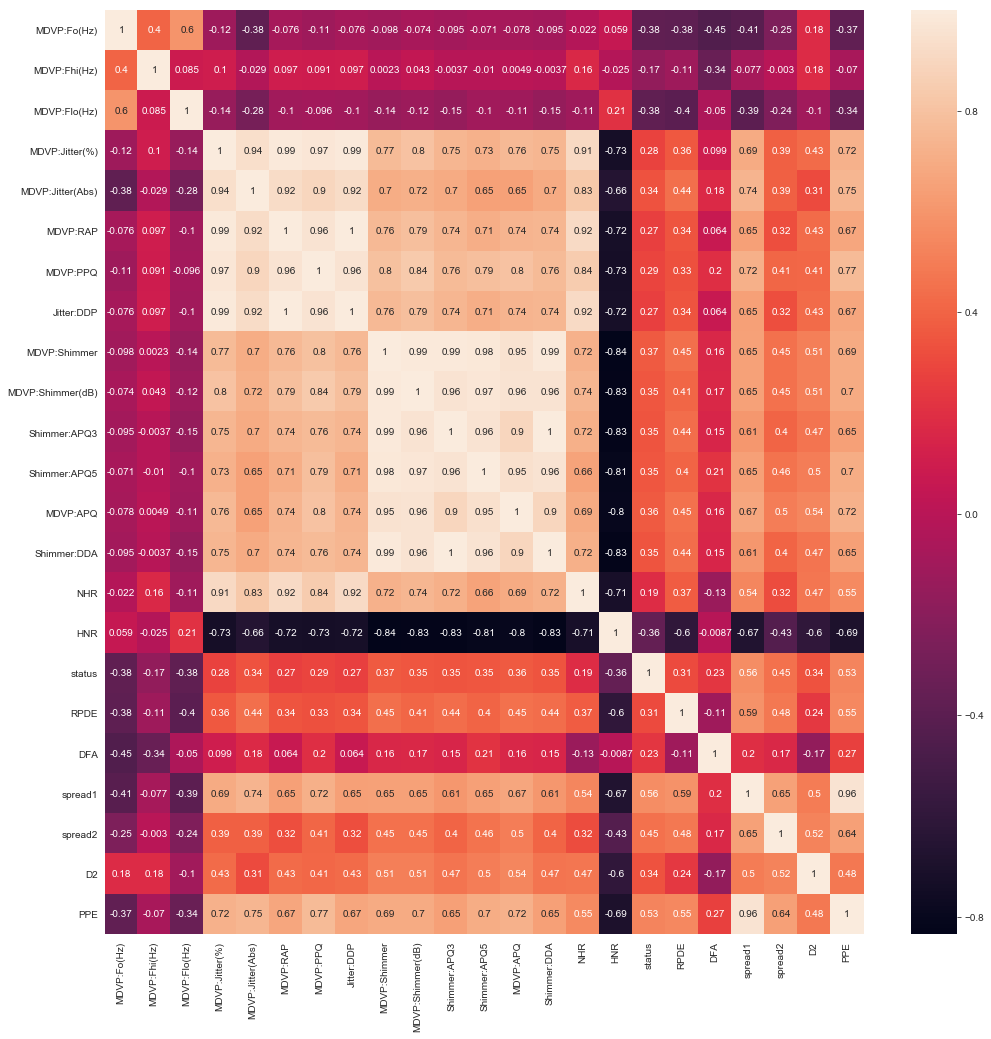

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(17,17))
sns.heatmap(corr,annot = True)

1)From the heat map we can find the shimmer APQ3 vs shimmer DDA and jitter DDP vs MDVP :RAP are close positively co related 

2)We can also see positive co relation between MDVP shimmer,MDVP shimmer(db),shimmer APQ3,APQ5,MDVP:APQ, shimmer DDA with MDVP jitteR(%),DVP JITTER(ABS),MDVP RAP,MDVP APQ

3) Column NHR and HNR are negatively co related 

4) HNR is negatively co related with the many of the attribute

Conclusion : We have very strong postive co relation between many of the attributes amongst the data set

# Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [82]:
#splitting the train and Test dataset
#splitting the other attributes from the target attribute and creating the train and test datasets
X = data.drop(["status"] , axis=1)
y = data[["status"]]

In [83]:
#applying zscore to normalize the data
from scipy.stats import zscore
X = X.apply(zscore)

In [84]:
X.shape

(195, 22)

In [85]:
y.shape

(195, 1)

In [86]:
y.head()

,status
0,1
1,1
2,1
3,1
4,1


In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [88]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(136, 22) (136, 1)
(59, 22) (59, 1)


# 5.Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [91]:
#my_model=DecisionTreeClassifier()
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

# 6) Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)

In [95]:
acc=dt_model.score(X_test, y_test)
print(acc)

0.9152542372881356


In [106]:
#confusion matrix
from sklearn import metrics
y_pred=dt_model.predict(X_test)
CM = metrics.confusion_matrix(y_pred, y_test)
print(CM)

[[11  4]
 [ 1 43]]


In [155]:
#predicting the accuracy score with metric.accuracy score function
y_pred=dt_model.predict(X_test)
acc=metrics.accuracy_score(y_pred, y_test)
print(acc)

0.9152542372881356


In [ ]:
#out of 59 prediction
#43/47 are default values 1s are correct predictions
#11/12 are non default values 0s are correct prediction
#1/12 are wrong prediction - 1 - non default values is predicted as default values
#4/47 are wrong prediction - 4 - default values is predicted as non default values

In [109]:
y_test.shape

(59, 1)

In [110]:
y_pred.shape #while doing cross tab got and issue with the shape of the matrix, y_test is (59,1) & y_pred shape is (59,)
             #hence resturcted as y2 and derived the cross tab

(59,)

In [112]:
X_test.shape

(59, 22)

In [117]:
y2 = data["status"]
y2.shape

(195,)

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y2, test_size=0.30, random_state=7)

In [119]:
y_pred=dt_model.predict(X_test)

In [124]:
y_pred.shape

(59,)

In [123]:
#crosstab analysis
pd.crosstab(y_test,y_pred,margins=True)

col_0,0,1,All
status,,,
0,11,1,12
1,4,43,47
All,15,44,59


# Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

# Regularizing the parameters - max depth and min_sample_leaf

In [125]:
dt_model1=DecisionTreeClassifier(criterion = 'entropy',max_depth=2, min_samples_leaf=1,random_state=5)
dt_model1.fit(X_train,y_train)
y_pred1=dt_model1.predict(X_test)
acc1=metrics.accuracy_score(y_pred1, y_test)
print(acc1)
CM1=metrics.confusion_matrix(y_pred1, y_test)
print(CM1)

0.847457627118644
[[ 8  5]
 [ 4 42]]


In [126]:
dt_model2=DecisionTreeClassifier(criterion = 'entropy',max_depth=3, min_samples_leaf=1,random_state=5)
dt_model2.fit(X_train,y_train)
y_pred2=dt_model2.predict(X_test)
acc2=metrics.accuracy_score(y_pred2, y_test)
print(acc2)
CM2=metrics.confusion_matrix(y_pred2, y_test)
print(CM2)

0.9152542372881356
[[ 9  2]
 [ 3 45]]


In [128]:
dt_model4=DecisionTreeClassifier(criterion = 'entropy',max_depth=4, min_samples_leaf=1, random_state=5)
dt_model4.fit(X_train,y_train)
y_pred4=dt_model4.predict(X_test)
acc4=metrics.accuracy_score(y_pred4, y_test)
print(acc4)
CM4=metrics.confusion_matrix(y_pred4, y_test)
print(CM4)

0.8983050847457628
[[11  5]
 [ 1 42]]


In [147]:
dt_model5=DecisionTreeClassifier(criterion = 'entropy',max_depth=5, min_samples_leaf=1, random_state=5)
dt_model5.fit(X_train,y_train)
y_pred5=dt_model5.predict(X_test)
acc5=metrics.accuracy_score(y_pred5, y_test)
print(acc5)
CM5=metrics.confusion_matrix(y_pred5, y_test)
print(CM5)

0.9152542372881356
[[11  4]
 [ 1 43]]


In [148]:
dt_model6=DecisionTreeClassifier(criterion = 'entropy',max_depth=6, min_samples_leaf=1, random_state=5)
dt_model6.fit(X_train,y_train)
y_pred6=dt_model6.predict(X_test)
acc6=metrics.accuracy_score(y_pred6, y_test)
print(acc6)
CM6=metrics.confusion_matrix(y_pred6, y_test)
print(CM6)

0.9152542372881356
[[11  4]
 [ 1 43]]


In [149]:
dt_model7=DecisionTreeClassifier(criterion = 'entropy',max_depth=7, min_samples_leaf=1, random_state=5)
dt_model7.fit(X_train,y_train)
y_pred7=dt_model7.predict(X_test)
acc7=metrics.accuracy_score(y_pred7, y_test)
print(acc4)
CM7=metrics.confusion_matrix(y_pred7, y_test)
print(CM7)

0.9152542372881356
[[11  4]
 [ 1 43]]


# On running the model with various depths (1,2,3,4,5,6,7), we see the accuracy score and the confusion matrix values are consistent from the max_depth value 5 for the minimum sample leaf value 1

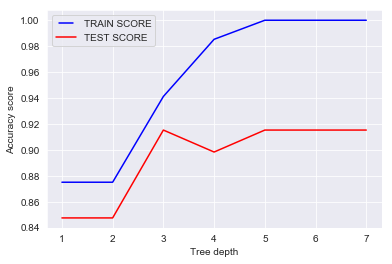

In [151]:
#Collating and doing in a single code, max depth from 1 to 7, min sample leafs are not considered and plotting the values
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 7, 7, endpoint=True)              #numpy.linspace (start, stop, num=50) format
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion = 'entropy', random_state=5)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    score_train = metrics.accuracy_score(train_pred, y_train)
    # Add score to previous train results
    train_results.append(score_train)
    test_pred = dt.predict(X_test)
    score_test = metrics.accuracy_score(test_pred, y_test)
    # Add score to previous test results
    test_results.append(score_test)

line1, = plt.plot(max_depths, train_results, 'b', label="TRAIN SCORE")
line2, = plt.plot(max_depths, test_results, 'r', label="TEST SCORE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

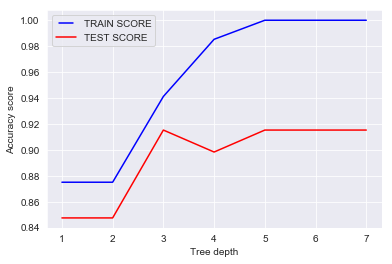

In [158]:
#Collating and doing in a single code, max depth from 1 to 7, min sample leafs are considered as 1 and plotting the values
from matplotlib.legend_handler import HandlerLine2D
max_depths = np.linspace(1, 7, 7, endpoint=True)     
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,min_samples_leaf = 1, criterion = 'entropy', random_state=5)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    score_train = metrics.accuracy_score(train_pred, y_train)
    # Add score to previous train results
    train_results.append(score_train)
    test_pred = dt.predict(X_test)
    score_test = metrics.accuracy_score(test_pred, y_test)
    # Add score to previous test results
    test_results.append(score_test)

line1, = plt.plot(max_depths, train_results, 'b', label="TRAIN SCORE")
line2, = plt.plot(max_depths, test_results, 'r', label="TEST SCORE")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

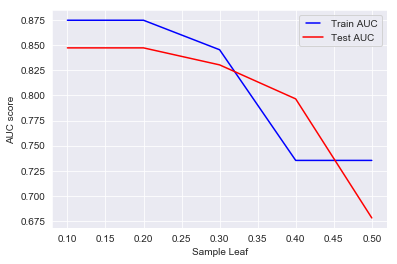

In [163]:
#Since accuracy score and values are consistent at max depth value 5, I have considered the max depth value 5
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True) #min_samples_leaf must be at least 1 or in (0, 0.5)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth=5,min_samples_leaf=min_samples_leaf, criterion = 'entropy')
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    score_train = metrics.accuracy_score(train_pred, y_train)
    #score_train = dt.score(X_train, y_train) since of not proper shapes of the dataset we are not able to use this function
    # Add score to previous train results
    train_results.append(score_train)
    test_pred = dt.predict(X_test)
    #score_test = metrics.accuracy_score(test_pred, y_test) #hence using the metrics.accuracy_score function to predict the scores
    score_test = dt.score(X_test, y_test)
    # Add score to previous test results
    test_results.append(score_test)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Sample Leaf')
plt.show()

As seen in the graph above increasing the value of sample leaf causes an underfitting model. Hence we can maintain the value has min_samples_leaf=1 for the best fit

In [162]:
score_train = (X_train.shape, y_train.shape)  #due to improper shapes we are not able to use the model.score function hence using
    # Add score to previous train results     #metrics.accuracy_score function to predict the scores
    #train_results.append(score_train)
    #test_pred = dt.predict(X_test)
    #score_test = metrics.accuracy_score(test_pred, y_test)
score_test = (X_test.shape, y_test.shape)
print(score_train)
print(score_test)

((136, 22), (136,))
((59, 22), (59,))


# Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [167]:
#Implementing the random forest model
rfcl = RandomForestClassifier(n_estimators=50,criterion='entropy', random_state=5)
rfcl.fit(X_train,y_train) 
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_predict, y_test))

0.9152542372881356
[[ 9  2]
 [ 3 45]]


In [168]:
#Finding the optimal number of trees
for i in [5,10,15,20,25,30,35,40,45,50,60,80,100]:
    rfcl1 = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5, random_state=0)
    rfcl1.fit(X_train,y_train)
    y_predict1 = rfcl1.predict(X_test)   # performance on test data
    acc_Rf = metrics.accuracy_score(y_predict1, y_test)
    print("for %d trees the accuracy is %.10f" %(i ,acc_Rf))

for 5 trees the accuracy is 0.9152542373
for 10 trees the accuracy is 0.8983050847
for 15 trees the accuracy is 0.8813559322
for 20 trees the accuracy is 0.8644067797
for 25 trees the accuracy is 0.8813559322
for 30 trees the accuracy is 0.8813559322
for 35 trees the accuracy is 0.8813559322
for 40 trees the accuracy is 0.8813559322
for 45 trees the accuracy is 0.8813559322
for 50 trees the accuracy is 0.8983050847
for 60 trees the accuracy is 0.8813559322
for 80 trees the accuracy is 0.8813559322
for 100 trees the accuracy is 0.8813559322


In [169]:
#Finding the optimal number of trees
for i in [5,10,15,20,25,30,35,40,45,50,60,80,100]:
    rfcl1 = RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5, random_state=0)
    rfcl1.fit(X_train,y_train)
    #y_predict1 = rfcl1.predict(X_test)   # performance on test data
    #acc_Rf = metrics.accuracy_score(y_predict1, y_test)
    acc_rf = rfcl1.score(X_test,y_test)
    print("for %d trees the accuracy is %.10f" %(i ,acc_Rf))

for 5 trees the accuracy is 0.8813559322
for 10 trees the accuracy is 0.8813559322
for 15 trees the accuracy is 0.8813559322
for 20 trees the accuracy is 0.8813559322
for 25 trees the accuracy is 0.8813559322
for 30 trees the accuracy is 0.8813559322
for 35 trees the accuracy is 0.8813559322
for 40 trees the accuracy is 0.8813559322
for 45 trees the accuracy is 0.8813559322
for 50 trees the accuracy is 0.8813559322
for 60 trees the accuracy is 0.8813559322
for 80 trees the accuracy is 0.8813559322
for 100 trees the accuracy is 0.8813559322
